# KDD Cup 99

http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between ''bad'' connections, called intrusions or attacks, and ''good'' normal connections.


### Get training data

Note: we only use 10% data.


In [1]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz

--2020-04-25 18:43:12--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  2.36MB/s    in 0.9s    

2020-04-25 18:43:13 (2.36 MB/s) - ‘kddcup.data_10_percent.gz’ saved [2144903/2144903]



In [2]:
!gzip -d kddcup.data_10_percent.gz

gzip: kddcup.data_10_percent already exists; do you wish to overwrite (y or n)? y


In [3]:
!ls -al

total 119300
drwxr-xr-x 1 root root     4096 Apr 25 18:43 .
drwxr-xr-x 1 root root     4096 Apr 25 15:17 ..
drwxr-xr-x 1 root root     4096 Apr 23 16:11 .config
-rw-r--r-- 1 root root 47251540 May 16  2000 corrected
-rw-r--r-- 1 root root 74889749 Jun 26  2007 kddcup.data_10_percent
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data


### Read data


In [0]:
import pandas as pd

In [5]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
  
kdd_data_10percent = pd.read_csv("/content/kddcup.data_10_percent", header=None, names = col_names)
print(kdd_data_10percent.shape)

(494021, 42)


In [6]:
# hack !!!!!
# use even less data again, because this script may run slow
# here, you can only use a small portion of data
# I set it to 0.05

kdd_data_10percent = kdd_data_10percent.sample(frac=0.05)
print(kdd_data_10percent.shape)

(24701, 42)


In [7]:
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
412401,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,449,449,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
18129,0,tcp,http,S1,297,10220,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.25,0.25,0.0,0.0,1.00,0.00,0.0,17,255,1.00,0.00,0.06,0.02,0.06,0.0,0.0,0.0,normal.
170266,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
45552,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.
60783,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,4,1.00,1.00,0.0,0.0,0.04,0.07,0.0,255,4,0.02,0.07,0.00,0.00,1.00,1.0,0.0,0.0,neptune.


In [8]:
kdd_data_10percent['label'].value_counts()

# Note that 'normal' is normal traffic;
# the rests are all abnormal traffic.

smurf.              14039
neptune.             5399
normal.              4873
back.                 102
satan.                 75
portsweep.             50
ipsweep.               47
teardrop.              36
warezclient.           35
pod.                   17
nmap.                  17
guess_passwd.           3
warezmaster.            3
land.                   2
buffer_overflow.        2
imap.                   1
Name: label, dtype: int64

In [9]:
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24701.000000,2.470100e+04,2.470100e+04,24701.000000,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000
mean,38.257965,1.068632e+03,1.049704e+03,0.000081,0.005020,0.0,0.032468,0.000121,0.148132,0.004372,0.000040,0.0,0.005546,0.000486,0.000162,0.001134,0.0,0.0,0.001619,332.344359,292.840087,0.177558,0.177498,0.057021,0.057309,0.790500,0.020491,0.027809,232.508765,188.579410,0.753662,0.030112,0.600892,0.006138,0.177640,0.177182,0.057764,0.057229
std,578.500406,2.035299e+04,4.725483e+04,0.008998,0.117218,0.0,0.731699,0.011020,0.355238,0.068390,0.006363,0.0,0.201034,0.023803,0.012725,0.038160,0.0,0.0,0.040210,213.046043,246.388451,0.381466,0.381748,0.230842,0.231601,0.389162,0.079890,0.138443,64.860380,106.137857,0.411061,0.106691,0.481413,0.037452,0.381352,0.381576,0.229809,0.229571
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31709.000000,2.194619e+06,5.151049e+06,1.000000,3.000000,0.0,30.000000,1.000000,1.000000,3.000000,1.000000,0.0,9.000000,2.000000,1.000000,2.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
kdd_data_10percent.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Question #1:

You need to deal with categorical columns, such as protocol_type, service, and flags.

However, you can simply ignore them now, and try deal with them later to improve the accuracy.

In [11]:
# 先查看 protocol type 的種類與個數
kdd_data_10percent.protocol_type.value_counts()

icmp    14168
tcp      9521
udp      1012
Name: protocol_type, dtype: int64

In [12]:
# 查看 service 的種類與個數
kdd_data_10percent.service.value_counts()

ecr_i      14078
private     5602
http        3218
smtp         460
other        329
           ...  
login          2
tim_i          1
X11            1
urh_i          1
courier        1
Name: service, Length: 63, dtype: int64

In [13]:
# 查看 flag 的種類與個數
kdd_data_10percent.flag.value_counts()

SF      18904
S0       4374
REJ      1336
RSTR       42
RSTO       33
SH          8
S1          2
S3          1
S2          1
Name: flag, dtype: int64

In [0]:
# 因為存在無序的類別資料，因此將其轉換為 Dummy Variable (One hot encoding)
# data_dum = pd.get_dummies(kdd_data_10percent, columns=["protocol_type", "service", "flag"])
# kdd_data_10percent = pd.DataFrame(data_dum)
# kdd_data_10percent.head()

# 但後來發現 Training data 與 Test data 的類別變數內的種類可能不相同，因此這個方法好像不太好
# 改用下一個 cell 中的手動轉換方式

In [0]:
# 因為存在無序的類別資料，因此將其轉換為 Dummy Variable (One hot encoding)
# 且因為底下的 test data 也需要做此轉換，因此決定打包成函數
def convert_dummy_variables(df):
    df["is_icmp"] = df["protocol_type"].apply(lambda x: 1 if x == "icmp" else 0)
    df["is_tcp"] = df["protocol_type"].apply(lambda x: 1 if x == "tcp" else 0)
    df["is_udp"] = df["protocol_type"].apply(lambda x: 1 if x == "udp" else 0)

    df["is_ecr_i"] = df["service"].apply(lambda x: 1 if x == "ecr_i" else 0)
    df["is_private"] = df["service"].apply(lambda x: 1 if x == "private" else 0)
    df["is_http"] = df["service"].apply(lambda x: 1 if x == "http" else 0)
    df["is_smtp"] = df["service"].apply(lambda x: 1 if x == "smtp" else 0)
    df["is_domain_u"] = df["service"].apply(lambda x: 1 if x == "domain_u" else 0)
    df["is_ftp_data"] = df["service"].apply(lambda x: 1 if x == "ftp_data" else 0)

    df["is_SF"] = df["flag"].apply(lambda x: 1 if x == "SF" else 0)
    df["is_S0"] = df["flag"].apply(lambda x: 1 if x == "S0" else 0)
    df["is_REJ"] = df["flag"].apply(lambda x: 1 if x == "REJ" else 0)

    df = df.drop(["protocol_type", "service", "flag"], axis=1)

    return df

In [16]:
kdd_data_10percent = convert_dummy_variables(kdd_data_10percent)
kdd_data_10percent.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,is_icmp,is_tcp,is_udp,is_ecr_i,is_private,is_http,is_smtp,is_domain_u,is_ftp_data,is_SF,is_S0,is_REJ
412401,0,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,449,449,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.,1,0,0,1,0,0,0,0,0,1,0,0
18129,0,297,10220,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.25,0.25,0.0,0.0,1.00,0.00,0.0,17,255,1.00,0.00,0.06,0.02,0.06,0.0,0.0,0.0,normal.,0,1,0,0,0,1,0,0,0,0,0,0
170266,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.,1,0,0,1,0,0,0,0,0,1,0,0
45552,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,smurf.,1,0,0,1,0,0,0,0,0,1,0,0
60783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,4,1.00,1.00,0.0,0.0,0.04,0.07,0.0,255,4,0.02,0.07,0.00,0.00,1.00,1.0,0.0,0.0,neptune.,0,1,0,0,1,0,0,0,0,0,1,0


### feature selection

Some features are not useful. How do you know?

Assume all of them are useful, and you can come back to check them later.

Note: features do not contain 'label'.

In [17]:
# 先透過 describe 觀察資料內容
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_icmp,is_tcp,is_udp,is_ecr_i,is_private,is_http,is_smtp,is_domain_u,is_ftp_data,is_SF,is_S0,is_REJ
count,24701.000000,2.470100e+04,2.470100e+04,24701.000000,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000
mean,38.257965,1.068632e+03,1.049704e+03,0.000081,0.005020,0.0,0.032468,0.000121,0.148132,0.004372,0.000040,0.0,0.005546,0.000486,0.000162,0.001134,0.0,0.0,0.001619,332.344359,292.840087,0.177558,0.177498,0.057021,0.057309,0.790500,0.020491,0.027809,232.508765,188.579410,0.753662,0.030112,0.600892,0.006138,0.177640,0.177182,0.057764,0.057229,0.573580,0.385450,0.040970,0.569936,0.226792,0.130278,0.018623,0.012550,0.009716,0.765313,0.177078,0.054087
std,578.500406,2.035299e+04,4.725483e+04,0.008998,0.117218,0.0,0.731699,0.011020,0.355238,0.068390,0.006363,0.0,0.201034,0.023803,0.012725,0.038160,0.0,0.0,0.040210,213.046043,246.388451,0.381466,0.381748,0.230842,0.231601,0.389162,0.079890,0.138443,64.860380,106.137857,0.411061,0.106691,0.481413,0.037452,0.381352,0.381576,0.229809,0.229571,0.494566,0.486711,0.198225,0.495095,0.418766,0.336616,0.135191,0.111324,0.098093,0.423812,0.381742,0.226194
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,

In [0]:
# 發現 urgent, num_failed_logins, su_attempted, num_outbound_cmds, is_host_login 這幾個變數整行皆為 0，因此可以刪去
features = kdd_data_10percent.drop(["urgent", "num_failed_logins", "su_attempted", "num_outbound_cmds", "is_host_login"], axis=1)

In [19]:
#num_features = [
#    "duration","src_bytes",
#    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
#    "logged_in","num_compromised","root_shell","su_attempted","num_root",
#    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
#    "is_host_login","is_guest_login","count","srv_count","serror_rate",
#    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
#    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
#    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
#    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
#    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
#]

# 因為類別資料已經轉換，且無用的變數也都已經刪去，因此最後再移除目標變數 label 即可 
features = features.drop(["label"], axis=1).astype(float)
features.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_icmp,is_tcp,is_udp,is_ecr_i,is_private,is_http,is_smtp,is_domain_u,is_ftp_data,is_SF,is_S0,is_REJ
412401,0.0,520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,449.0,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18129,0.0,297.0,10220.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.25,0.25,0.0,0.0,1.00,0.00,0.0,17.0,255.0,1.00,0.00,0.06,0.02,0.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
170266,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45552,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,0.00,0.00,0.0,0.0,1.00,0.00,0.0,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,4.0,1.00,1.00,0.0,0.0,0.04,0.07,0.0,255.0,4.0,0.02,0.07,0.00,0.00,1.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Target



In [20]:
labels = kdd_data_10percent['label'].copy()
labels[labels != 'normal.'] = 'attack.'
labels.value_counts()

attack.    19828
normal.     4873
Name: label, dtype: int64

Question #2:

attack: normal = 4:1

A little bit unbalance. But it is not a serious problem. 

Do you want to apply oversampling or downsampling on the data?

If you want to, come back later to apply one of them on the data.

In [21]:
# 用 ADASYN 來做 Oversampling 
from imblearn.over_sampling import ADASYN
ada = ADASYN()
f, labels = ada.fit_resample(features, labels)
features = pd.DataFrame(f, columns=features.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
import numpy as np
unique, counts = np.unique(labels, return_counts = True)
print(unique, counts)

['attack.' 'normal.'] [19828 19821]


In [23]:
features

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_icmp,is_tcp,is_udp,is_ecr_i,is_private,is_http,is_smtp,is_domain_u,is_ftp_data,is_SF,is_S0,is_REJ
0,0.0,520.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.000000,449.000000,0.00,0.00,0.0,0.0,1.00,0.00,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,297.000000,10220.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,4.000000,0.25,0.25,0.0,0.0,1.00,0.00,0.000000,17.000000,255.000000,1.000000,0.000000,0.060000,0.020000,0.06,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1032.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,0.00,0.00,0.0,0.0,1.00,0.00,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1032.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,0.00,0.00,0.0,0.0,1.00,0.00,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.000000,4.000000,1.00,1.00,0.0,0.0,0.04,0.07,0.000000,255.000000,4.000000,0.020000,0.070000,0.000000,0.000000,1.00,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,0.0,1556.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.859693,6.644770,0.00,0.00,0.0,0.0,1.00,0.00,0.259075,81.161372,73.970010,0.500357,0.072895,0.500357,0.027851,0.00,0.002149,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
39645,0.0,1551.763503,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.655169,8.655169,0.00,0.00,0.0,0.0,1.00,0.00,0.000000,18.216772,123.522152,0.903546,0.117537,0.903546,0.020000,0.00,0.009507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
39646,0.0,1556.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.356934,6.267700,0.00,0.00,0.0,0.0,1.00,0.00,0.300553,91.593624,65.800174,0.429971,0.065354,0.429971,0.029108,0.00,0.000892,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
39647,0.0,1519.817785,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.054936,6.054936,0.00,0.00,0.0,0.0,1.00,0.00,0.000000,28.200979,95.970084,0.712809,0.115793,0.712809,0.032622,0.00,0.005793,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Standardization or Normalization

Don't forget to shift the data. I provide 4 implementations. Simply choose one.

In [0]:
# from sklearn.preprocessing import StandardScaler
# features = pd.DataFrame(StandardScaler().fit_transform(features), columns = features.columns, index = features.index)

# 用 sklearn 才不會出現整欄都為 0 時發生 NaN 的問題 (pandas 會發生 NaN 問題)
from sklearn.preprocessing import MinMaxScaler
features = pd.DataFrame(MinMaxScaler().fit_transform(features), columns = features.columns, index = features.index)

In [0]:
# use pandas to implement StandardScaler
# features = (features-features.mean())/(features.std())

# use pandas to implement MinMaxScaler
# features = (features-features.min())/(features.max()-features.min())

In [26]:
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_icmp,is_tcp,is_udp,is_ecr_i,is_private,is_http,is_smtp,is_domain_u,is_ftp_data,is_SF,is_S0,is_REJ
count,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000,39649.000000
mean,0.005217,0.002117,0.000200,0.000050,0.001042,0.012764,0.290981,0.000908,0.000025,0.005685,0.000610,0.000101,0.000353,0.020121,0.408351,0.361089,0.114747,0.113684,0.088370,0.088550,0.863674,0.023242,0.078088,0.689180,0.553789,0.647125,0.063631,0.492395,0.025665,0.113225,0.111229,0.093338,0.087827,0.368564,0.541132,0.090304,0.357600,0.143955,0.146656,0.024251,0.058073,0.178726,0.791419,0.113371,0.086675
std,0.045939,0.012244,0.007257,0.007102,0.030850,0.083521,0.439464,0.018007,0.005022,0.047375,0.015449,0.010044,0.015062,0.132601,0.453129,0.468504,0.314508,0.314455,0.275134,0.275511,0.324293,0.101108,0.220208,0.391053,0.432488,0.405040,0.144982,0.439656,0.069674,0.312473,0.312904,0.274960,0.269428,0.478437,0.489763,0.273443,0.478439,0.349851,0.345918,0.139863,0.220820,0.369501,0.403303,0.315380,0.273248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003680,0.003914,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.260147,0.084741,0.209866,0.000000,0.013204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058708,0.019569,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.510170,0.985476,0.007550,0.373800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000470,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.070000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

Question #3:

StandardScaler (mean=0; std=1) or MinMaxScaler (range 0~1)?

Which one does make sense when we analyze packets or flows? Why?




Answer #3:

當分析 packets 或 flows 的時候，我覺得使用 MinMaxScaler 比較合理！

因為欄位大多為"計數"或"比率"的資料類型，因此若是用 StandardScaler 做標準化的話，會出現負數，較為不合理。

而 MinMaxScaler 是轉換至 0~1 區間，因此 MinMaxScaler 會比較合理！

### PCA and plot

Too many dimensions, try to use PCA to redue dimensions.


In [27]:
features.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_icmp,is_tcp,is_udp,is_ecr_i,is_private,is_http,is_smtp,is_domain_u,is_ftp_data,is_SF,is_S0,is_REJ
0,0.0,0.000237,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.878669,0.878669,0.00,0.00,0.0,0.0,1.00,0.00,0.0,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.000135,0.001984,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.007828,0.25,0.25,0.0,0.0,1.00,0.00,0.0,0.062992,1.000000,1.00,0.00,0.06,0.02,0.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000470,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.00,0.00,0.0,0.0,1.00,0.00,0.0,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.000470,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.00,0.00,0.0,0.0,1.00,0.00,0.0,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205479,0.007828,1.00,1.00,0.0,0.0,0.04,0.07,0.0,1.000000,0.011811,0.02,0.07,0.00,0.00,1.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features)
print(pca.explained_variance_ratio_)

[4.41268321e-01 2.15957740e-01 1.28889970e-01 6.52624642e-02
 4.82173837e-02 2.52611757e-02 1.39434045e-02 1.09732894e-02
 8.32686205e-03 7.82847884e-03 5.78315052e-03 4.72401628e-03
 4.06803978e-03 3.54002161e-03 3.35086488e-03 1.98999338e-03
 1.78624031e-03 1.39492037e-03 1.03472642e-03 1.00378536e-03
 8.60569749e-04 7.87287171e-04 6.67107634e-04 4.83240781e-04
 4.38370742e-04 3.67424297e-04 3.19459728e-04 2.80819096e-04
 2.32423226e-04 2.16514420e-04 1.79710558e-04 9.53005683e-05
 8.78060410e-05 7.07272928e-05 6.32909668e-05 6.16358399e-05
 5.90637329e-05 3.43219639e-05 2.66133355e-05 2.26819848e-05
 1.38049209e-05 1.23125153e-05 8.30701626e-06 6.35836717e-06
 3.20245493e-31]


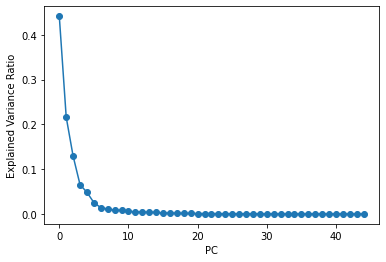

In [29]:
import matplotlib.pyplot as plt

_y = pca.explained_variance_ratio_
_x = range(len(_y))

plt.plot(_x, _y, '-o')

plt.xlabel("PC")
plt.ylabel("Explained Variance Ratio")
plt.show()

Question #4:

how many dimensions are good enough?

Answer #4:

由上圖可知，選擇 5 個主成份為佳，共可以解釋接近 90% 的總變異

In [30]:
# 選擇 3 個主成份(PC)，可以解釋的總變異量
pca = PCA(n_components=5)
# 要先用 fit_transform，再用一個變數(X_r)去接 PCA 後的結果，
# 才能在 X_r 得到 PCA 處理後的新變數值 (不能只用fit)
X_r = pca.fit_transform(features)
var_sum = sum(pca.explained_variance_ratio_)*100
print(round(var_sum,2), "%")

89.96 %


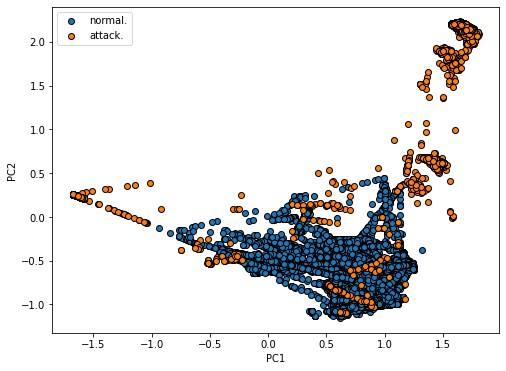

In [31]:
fig = plt.figure(figsize=(8,6))

pca_df = pd.DataFrame(X_r)
pca_df["y"] = list(labels)

for category in ["normal.", "attack."]:
    category_df = pca_df[pca_df["y"] == category]
    plt.scatter(category_df[0], category_df[1], edgecolors="k", cmap="jet", label = category)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Question #5:

Guess what classifier may do good job? Why?

(Logistic Regression, SVM, Tree, KNN, ...)

Answer #5:

因為 KNN 可以處理非線性問題，且從上圖來看，資料點的群聚現象很明顯，因此KNN 會是不錯的模型。

再者，因為訓練資料比測試資料的數量多很多，因此以 KNN 做分類效果應該會不錯。

而 SVM 與 Tree 也可以處理非線性問題，因此也可以進行嘗試。

### Training a classifier


with all dimensions.

In [0]:
from time import time

In [33]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

start_t = time()
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
clf.fit(features, labels)

end_t = time()
print("training time:", end_t-start_t, "seconds.")

training time: 3.426048755645752 seconds.


Question #6:

How long would it take to train a knn model? Why?

Can you shorten it? How?



Answer #6:

訓練 KNN Model 花費了大約 3 秒。

會花這麼多時間是因為，KNN 是以"計算距離"為基礎的演算法，

而此資料的變數(欄位)不少，因此對於這種高維度的資料，計算距離上就會需要花比較多的時間。

若是要改善效率，可以透過降維的方式達成。例如使用 PCA 把維度縮減到 5 維，如此在計算距離時便可以花費較少的時間。

In [34]:
# 透過前面 PCA 降維後的結果 (新變數 PC1, PC2, PC3, PC4, PC5) 來做分類，因為維度縮減，因此效率提升
start_t = time()
pca_clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
pca_clf.fit(pca_df[[0, 1, 2, 3, 4]], pca_df["y"])

end_t = time()
print("training time:", end_t-start_t, "seconds.")

training time: 0.23464584350585938 seconds.


### Get testing data

Note that: we only use 10% of the download data to save your time.

In [35]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz

--2020-04-25 18:43:36--  http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1409035 (1.3M) [application/x-gzip]
Saving to: ‘corrected.gz’

corrected.gz        100%[===================>]   1.34M   978KB/s    in 1.4s    

2020-04-25 18:43:37 (978 KB/s) - ‘corrected.gz’ saved [1409035/1409035]



In [36]:
!gzip -d corrected.gz

gzip: corrected already exists; do you wish to overwrite (y or n)? y


In [37]:
!ls -al

total 119300
drwxr-xr-x 1 root root     4096 Apr 25 18:43 .
drwxr-xr-x 1 root root     4096 Apr 25 15:17 ..
drwxr-xr-x 1 root root     4096 Apr 23 16:11 .config
-rw-r--r-- 1 root root 47251540 May 16  2000 corrected
-rw-r--r-- 1 root root 74889749 Jun 26  2007 kddcup.data_10_percent
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data


In [38]:
# read test data
kdd_data_corrected = pd.read_csv("/content/corrected", header=None, names = col_names)

# randomly select ?% data as testing data
kdd_data_corrected = kdd_data_corrected.sample(frac=0.01)
print(kdd_data_corrected.shape)

(3110, 42)


In [39]:
kdd_data_corrected.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
238097,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
12707,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
309850,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
284727,0,tcp,http,SF,303,3695,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31,255,1.0,0.00,0.03,0.04,0.0,0.0,0.0,0.0,normal.
291770,0,tcp,http,SF,244,5445,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12,255,1.0,0.00,0.08,0.04,0.0,0.0,0.0,0.0,normal.


In [40]:
# 先透過上面寫好的函數，將類別資料作轉換
kdd_data_corrected = convert_dummy_variables(kdd_data_corrected)

# 移除無用變數
test_features = kdd_data_corrected.drop(["urgent", "num_failed_logins", "su_attempted", "num_outbound_cmds", "is_host_login"], axis=1)

# change target to 'attack'
test_labels = kdd_data_corrected['label'].copy()
test_labels[test_labels != 'normal.'] = 'attack.'

# target
print(test_labels.value_counts())

# select features
test_features = test_features.drop(["label"], axis=1).astype(float)

# standardization or normailzation
from sklearn.preprocessing import MinMaxScaler
test_features = pd.DataFrame(MinMaxScaler().fit_transform(test_features), columns = test_features.columns, index = test_features.index)


attack.    2474
normal.     636
Name: label, dtype: int64


In [0]:
# Normal KNN prediction
from sklearn.metrics import accuracy_score

y_pred = clf.predict(test_features)
acc = accuracy_score(test_labels, y_pred)

In [42]:
print("ACC: {}.".format(round(acc,4)))

ACC: 0.9283.


In [0]:
# PCA KNN prediction
from sklearn.metrics import accuracy_score

# Test Data 要透過先前建置的 pca 進行 transform 轉換到 5 維，再做預測
test_features = pca.transform(test_features)
pca_y_pred = pca_clf.predict(test_features)
pca_acc = accuracy_score(test_labels, pca_y_pred)

In [44]:
print("PCA's ACC: {}.".format(round(pca_acc,4)))

PCA's ACC: 0.9299.


Question #7:

You accuracy?

In [45]:
print("My accuracy on normal KNN classifier is {} %".format(round(acc*100,2)))
print("-"*47)
print("My accuracy on pca KNN classifier is {} %".format(round(pca_acc*100,2)))

My accuracy on normal KNN classifier is 92.83 %
-----------------------------------------------
My accuracy on pca KNN classifier is 92.99 %


### Training and test other models

#### Decision Tree

In [46]:
# 嘗試其他模型
# 決策樹
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(pca_df[[0, 1, 2, 3, 4]], pca_df["y"])

# Predict
dt_pred = dt.predict(test_features)
dt_acc = accuracy_score(test_labels, dt_pred)

print("Decision Tree's accuracy: {} %".format(round(dt_acc*100,2)))

Decision Tree's accuracy: 92.6 %


#### Random Forest

In [47]:
# 隨機森林
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, random_state=42)
rf.fit(pca_df[[0, 1, 2, 3, 4]], pca_df["y"])

# Predict
rf_pred = rf.predict(test_features)
rf_acc = accuracy_score(test_labels, rf_pred)

print("Random Forest's accuracy: {} %".format(round(rf_acc*100,2)))

Random Forest's accuracy: 92.28 %


#### Logistic Regression

In [48]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42)
lg.fit(pca_df[[0, 1, 2, 3, 4]], pca_df["y"])

# Predict
lg_pred = lg.predict(test_features)
lg_acc = accuracy_score(test_labels, lg_pred)
# lg_acc_2 = lg.score(test_features, test_labels)  # same as lg_acc

print("Logistic Regression's accuracy: {} %".format(round(lg_acc*100,2)))

Logistic Regression's accuracy: 91.77 %


#### SVM

In [49]:
# SVM
from sklearn.svm import SVC

svc = SVC(kernel="rbf", random_state=42)
svc.fit(pca_df[[0, 1, 2, 3, 4]], pca_df["y"])

# Predict
svc_pred = svc.predict(test_features)
svc_acc = accuracy_score(test_labels, svc_pred)

print("SVM's accuracy: {} %".format(round(svc_acc*100,2)))

SVM's accuracy: 92.12 %


### Try Clustering


with all dimensions using training data.

using original lables (i.e., smurf., neptune., normal., ...)

In [0]:
features = kdd_data_10percent.drop(["label"], axis=1).astype(float)
labels = kdd_data_10percent['label'].copy() # original labels

In [51]:
from sklearn.cluster import KMeans
k = 30
km = KMeans(n_clusters = k)

km.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
pd.Series(km.labels_).value_counts()

19    11821
0      7594
10     2674
26     1018
21      570
15      267
9       157
28      137
16      122
5       103
14       56
20       56
8        43
25       36
17       20
13        9
24        3
1         2
2         2
29        1
18        1
3         1
27        1
4         1
11        1
6         1
22        1
23        1
12        1
7         1
dtype: int64

Question #8:

There are 30 clusters.

Could you find out which 'lable' is the majority in each cluster?


In [53]:
cluster_df = pd.DataFrame({"original_label": labels, "cluster_label": km.labels_})
cluster_df.head()

,original_label,cluster_label
412401,smurf.,10
18129,normal.,9
170266,smurf.,19
45552,smurf.,19
60783,neptune.,0


In [54]:
for i in range(k):
    print("Cluster {} labels:".format(i))
    print(cluster_df[cluster_df["cluster_label"] == i]["original_label"].value_counts())
    print()

Cluster 0 labels:
neptune.         5399
normal.          1946
satan.             75
portsweep.         49
ipsweep.           47
teardrop.          36
warezclient.       17
nmap.              17
guess_passwd.       3
land.               2
imap.               1
pod.                1
smurf.              1
Name: original_label, dtype: int64

Cluster 1 labels:
warezmaster.    2
Name: original_label, dtype: int64

Cluster 2 labels:
normal.    2
Name: original_label, dtype: int64

Cluster 3 labels:
normal.    1
Name: original_label, dtype: int64

Cluster 4 labels:
warezmaster.    1
Name: original_label, dtype: int64

Cluster 5 labels:
back.      102
normal.      1
Name: original_label, dtype: int64

Cluster 6 labels:
normal.    1
Name: original_label, dtype: int64

Cluster 7 labels:
normal.    1
Name: original_label, dtype: int64

Cluster 8 labels:
normal.    43
Name: original_label, dtype: int64

Cluster 9 labels:
normal.    157
Name: original_label, dtype: int64

Cluster 10 labels:
smurf.  

Question #9:

How do you name a cluster by the lables?

What if the lable in a cluster has no majority?

Answer #9:

可以發現異常的封包幾乎都被分到特定某幾群。因此可以用 "正常封包" 與 "異常封包" 來對各群進行命名。

對於那些群中只含有大量正常封包的群，我們命名其為 "正常"；

而對於那些群中有大量異常封包的群，我們命名其為 "異常"。

而若是某群中沒有明顯的大量正常或異常封包，表示該群中的封包可能要再進行檢查，因為若是少數封包被分到某群，表示這些封包呈現出與其他封包不同的特徵。因此命名這些及群為 "待定"。


Question #10:

Now you may go back to pervious cells to check if what you can improve.

List  what have you done right here.

1. 留下類別變數，但將其轉換為 Dummy variable (One hot encoding)
2. 特徵篩選 - 移除無用的變數
3. 因為正常與異常資料量有差距，因此用 ADASYN 進行 Oversampling 

4. 加上經過 PCA 轉換後的 KNN Classifier 以及其預測結果

5. 訓練其他模型並預測，比較其結果 (Decision Tree, Random Forest, Logistic Regression, SVM)